Uncover the factors that lead to employee attrition
---

Being a data scientist is not only about building machine learning algorithms. It includes exploring and finding new information from the available data (to use that information to create some type of value). The value could be information necessary to create a new feature for model building, or information on how to improve company working environment to reduce employee attrition. That said, we will explore a fictional data set created by IBM Data Scientist about employee attrition and go over interesting insights from data. Since this is an independent exploration we will go ahead and plan what we want to achieve even before taking a detailed look at the data itself. 

Why should you plan before starting a project? Planning reduces confusion and time invested in solving a problem. Let's take this example ( you will probably relate). You decided to buy new clothes for yourself. You are motivated, but you have a limited budget. You know for sure that you want to feel good and wear something elegant. You get to the store, and you see thousands of pieces. At this point, you start thinking," where should I start? I will buy a skirt, no maybe pants are better, or a dress, what color do I like the most? Will it look classy? Well, I do not even know what I want." You achieved stress and confusion, and most likely ended up leaving the store empty-handed or unsatisfied. In any occasion, planning is the first thing you should do before taking action. Avoid wasted resources. 

The Plan
---
* Define the goal and set of questions that might help with defined goal.
* Understand the dataset and information available.
* Create visualizations and retain the information in writing.
* Decide which variables could be important in predicting employee attrition for future stages of the project.

The Goal 
---
**Uncover factors associated with employee attrition.**

Relevant Questions 
---
* Which employee is more likely to leave?
* Why do employees want to leave?
* Why do employees want to stay. 
* How to motivate employees to stay.
* Does seniority, age, education, or other factors influence the probability of leaving.
* Are you doing your part to strengthen employee engagement,
* Do employees feel they can grow their careers and are they equipped to do so?
* Can employees see an opportunity for growth and are they satisfied with investment in growth?
* Are we prioritizing employee happiness, and are there opportunities to make work fun?
* Can we improve our culture to encourage transparency and respect?
* Are you paying attention to individual needs?
* What variables in the dataset can help me understand the above questions?

**Note, this is brainstorming, and you might not answer all questions. Nevertheless, you have a plan and guidance.** 

Data Exploration
---
 Step 1: Understand The Data (Data types, missing values, variable description, target variable )

The data can be found at : https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

The first thing I want to understand is what variables or attributes I have available. Because my goal does use data visualization to gain insight I am worried about the data types. Categorical and numerical data require different graph representations. During this step of understanding the variables, I can also spot which variables contain the most information.

At first glance, we can see that we have 34 independent variables and the dependent variable attrition.
Using the info and the hist function we discovered that in total we have 35 variables and 1470 employees represented in the loaded data frame. We can also see that although some variables are categorical, they are encoded numerically.

The hist function only plot variable represented numerically, that is why we see education plotted as a numerical variable although it is in nature categorical information.

With the histograms, we can spot two variables that have a constant value across all employers (Standard hours and Employee count) so these variables can be disregarded.

Since this data is fictional, we are lucky to not have to deal with missing values. 

In [13]:
# Importing relevamt libraries and plotting themes
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('fivethirtyeight')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

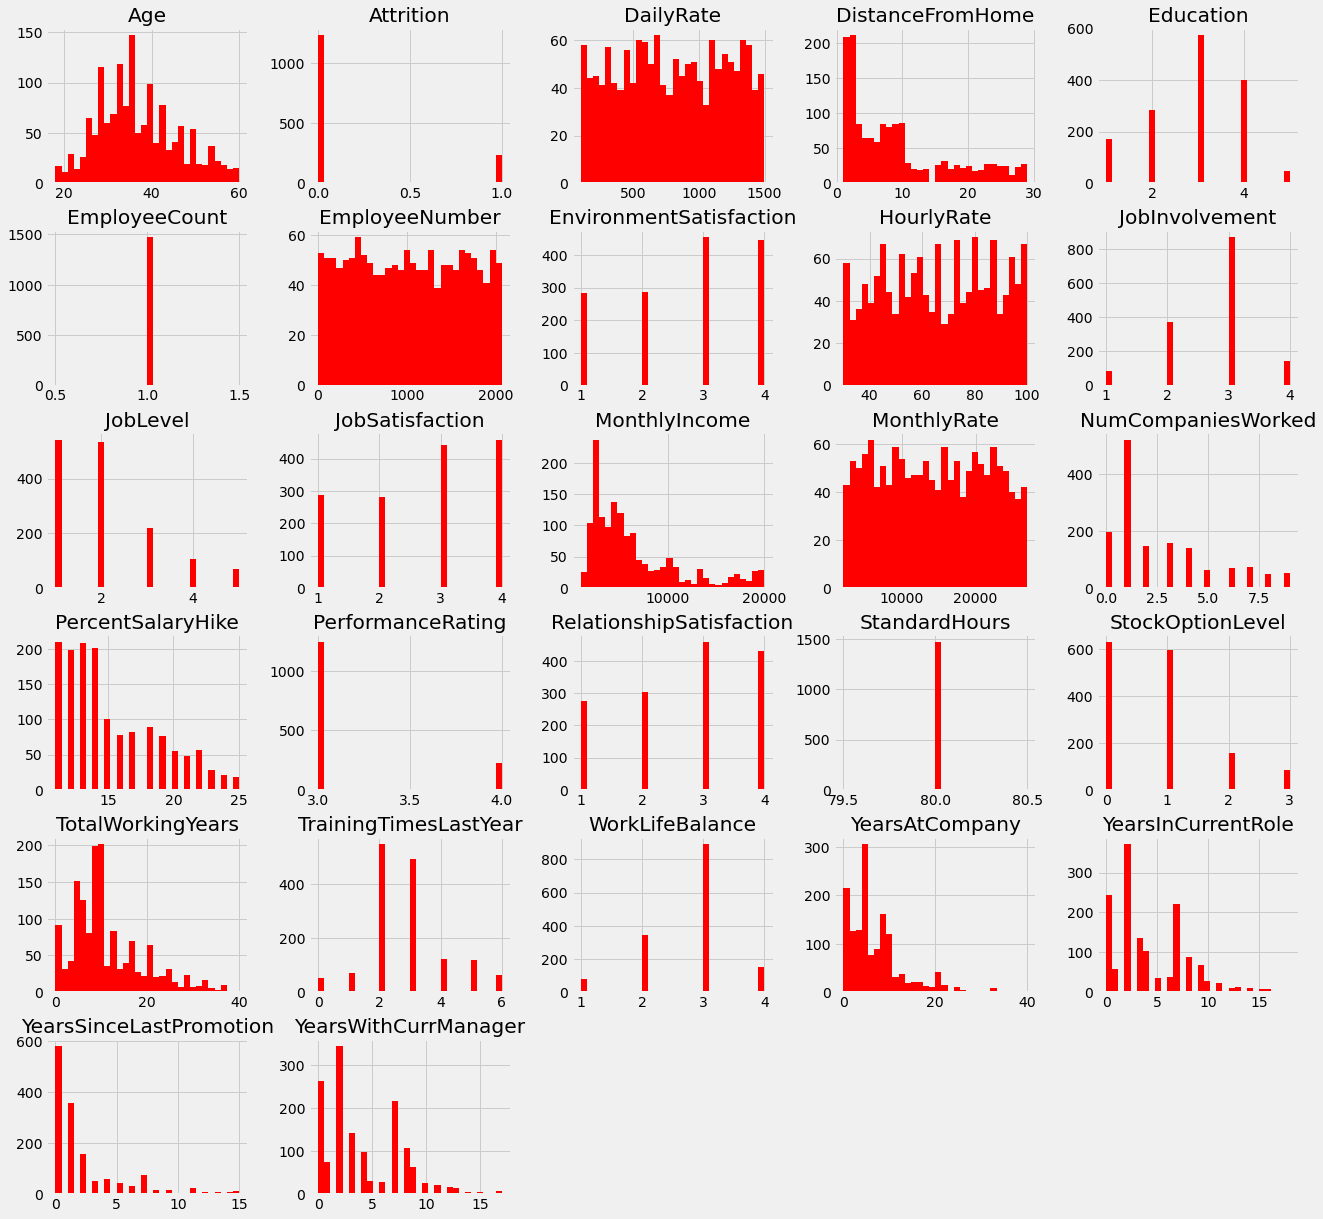

In [65]:
data = pd.read_csv("Human_Resources.csv") 
# To make the plots we need to encode the atrittion variable like so 
data['Attrition'] = data['Attrition'].apply(lambda x:1 if x == "Yes" else 0)
data.info()
print('\n')
data.hist(bins = 30, figsize = (20,20), color = 'red')
plt.show()

Step 2: Visualize the data using the questions you defined above as guiding boundaries.

To dive into the questions regarding employee satisfaction. We are going to explore the following variables and how they related to attrition:
* OverTime
* WorkLifeBalance
* StockOptionLevel
* RelationshipSatisfaction
* job satisfaction
* EnvironmentSatisfaction
* Business Travel

Specifically, the question we want to address are:
    
* Are we prioritizing employee happiness, and are there opportunities to make work fun?
* Can we improve our culture?
* Are we paying attention to individual needs?


To address whether a department is more susceptible of higher proportions of employee attrition we will explore the variables:

* Department
* Job Level
* Job Role
* Monthly income


Specific questions to address:

* Is a specific department experiencing more attrition (Sales, Human Resources, Research, and development) why?
* How does attrition relate to salary and department?


Visualization
---

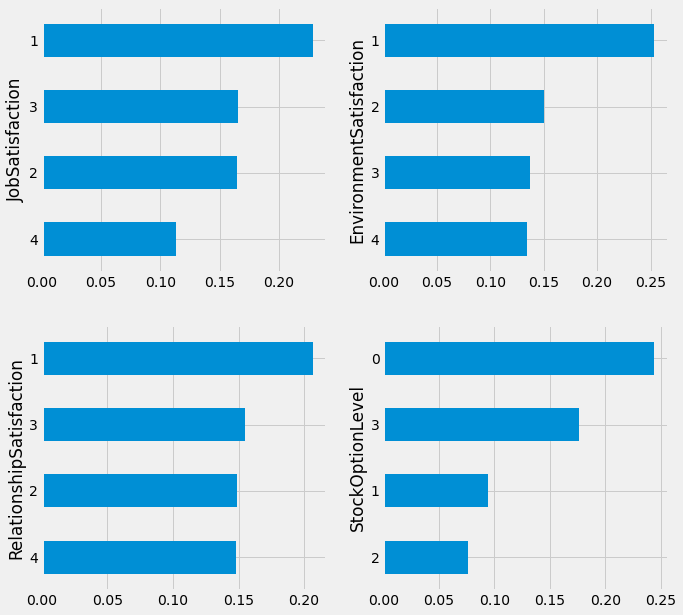

In [34]:
plt.figure(figsize= [10,10])
plt.subplot(221)
data.groupby(['JobSatisfaction'])['Attrition'].mean().sort_values().plot(kind='barh')
plt.subplot(222)
data.groupby(['EnvironmentSatisfaction'])['Attrition'].mean().sort_values().plot(kind='barh')
plt.subplot(223)
data.groupby(['RelationshipSatisfaction'])['Attrition'].mean().sort_values().plot(kind='barh')
plt.subplot(224)
data.groupby(['StockOptionLevel'])['Attrition'].mean().sort_values().plot(kind='barh')
plt.show()

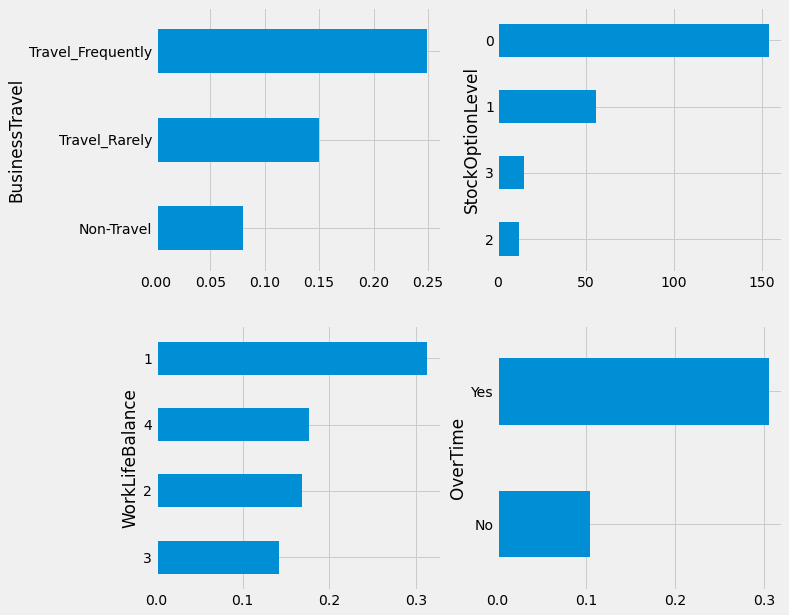

In [32]:
plt.figure(figsize =[10,10])
plt.subplot(221)
data.groupby(['BusinessTravel'])['Attrition'].mean().sort_values().plot(kind='barh')
plt.subplot(222)
data[data['Attrition'] == 1].groupby(['StockOptionLevel'])['Attrition'].count().sort_values().plot(kind='barh')
plt.subplot(223)
data.groupby(['WorkLifeBalance'])['Attrition'].mean().sort_values().plot(kind='barh')
plt.subplot(224)
data.groupby(['OverTime'])['Attrition'].mean().sort_values().plot(kind='barh')

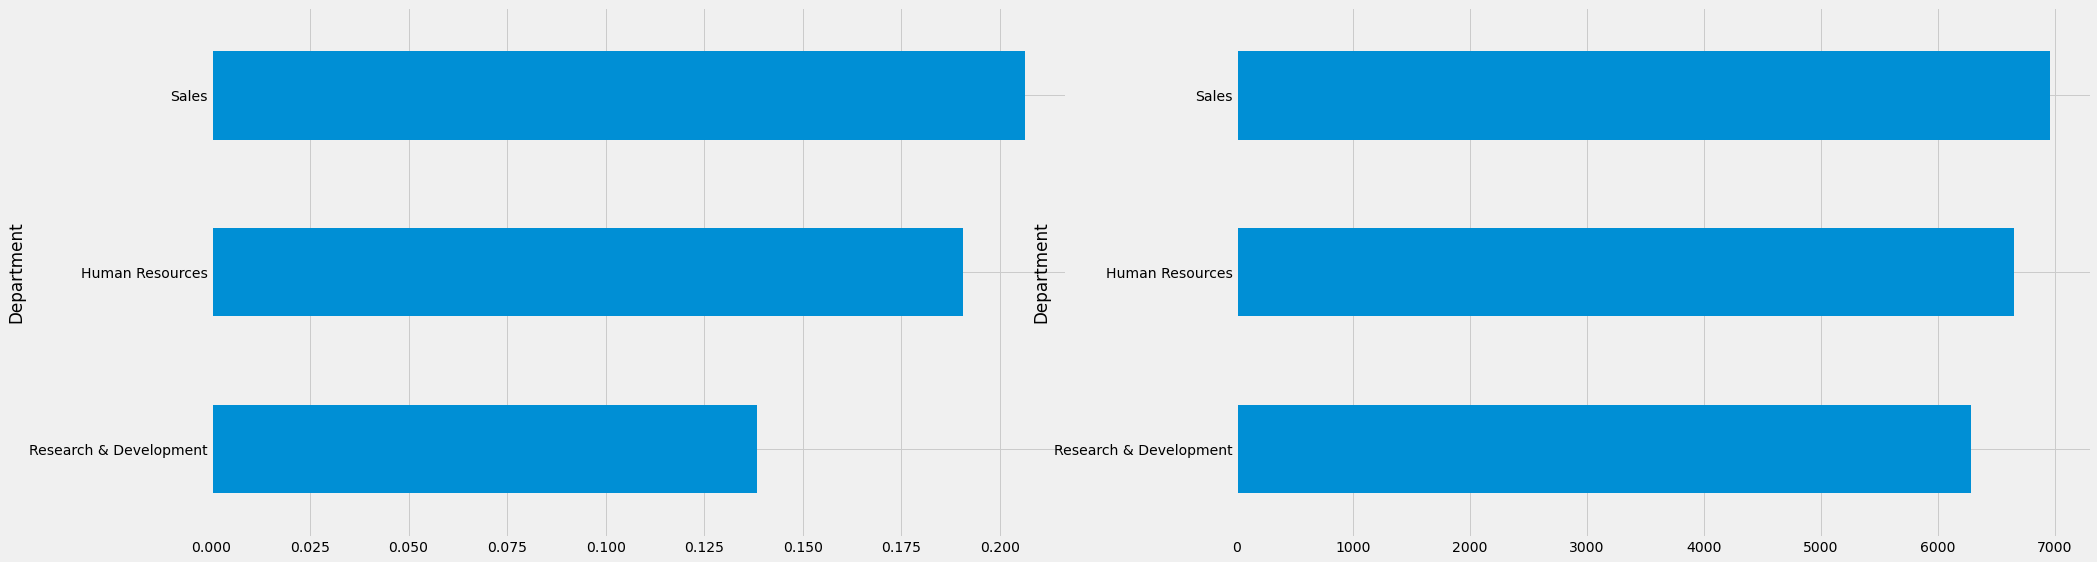

In [70]:
plt.figure(figsize =[30,20])
plt.subplot(221)
data.groupby(['Department'])['Attrition'].mean().sort_values().plot(kind='barh')
plt.subplot(222)
data.groupby(['Department'])['MonthlyIncome'].mean().sort_values().plot(kind='barh')

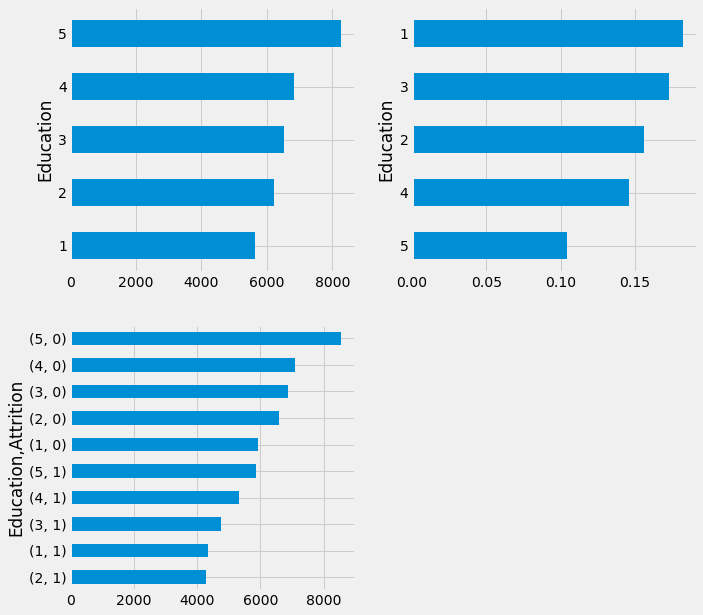

In [61]:
plt.figure(figsize =[10,10])
plt.subplot(221)
data.groupby(['Education'])['MonthlyIncome'].mean().sort_values(ascending= True).plot(kind='barh')
plt.subplot(222)
data.groupby(['Education'])['Attrition'].mean().sort_values(ascending= True).plot(kind='barh')
plt.subplot(223)
data.groupby(['Education','Attrition'])['MonthlyIncome'].mean().sort_values(ascending= True).plot(kind='barh')

Results of the visualization:
---
* A higher proportion of people leave the company if they have the lowest stock options level, job, environment, and relationship satisfaction.
* A higher proportion of people who travel frequently leave the company
* more people that leave the company have lower stock options
* People who have bad work-life balance are more likely to leave the company
* If you work overtime the probability that you may leave the job increases
* The sales department is experiencing more attrition but the average monthly income is greater for that department.
* The higher the education level the higher is the salary and the lower in the employee attrition
* Independently of education level, people who leave the company have a lower average monthly income compared to people who remain, employees
* The average salary for employees with the highest education who left the company is lower than the average salary of employees with lower education who remain at the company.


Relevant Answers
---
* Which employee is more likely to leave? 
    * The ones with lower Monthly Income and Low job satisfaction.
* Why do employees want to stay. 
    * They enjoy the culture and the pay.
* Does seniority, age, education, or other factors influence the probability of leaving.
    * Education paired with monthly income is important to motivate employees to stay.
* Can we improve our culture to encourage transparency and respect? 
    * This must be important due to how overall satisfaction influences employee retainment.
* Is a specific department experiencing more attrition (Sales, Human Resources, Research, and development) why?
    * The Sales department experiences more attrition. The reason is not clear so far.
* How does attrition relate to monthly income and department?
    * Sales department has the highest average monthly income and Research and development has the lowest average monthly income.
    
Conclusion
---
With simple bar graphs and histograms, we can uncover important factors that influence employee attrition.
We can do more data exploration to address more questions, but I will leave that to you.

The next step for this process will be building a machine learning algorithm and see how an overall understanding of the data available can help us with the modeling process.